# Breast Cancer Machine Learning Prediction
#### by George Traskas, started at 2017-10-12, made with Python 3 in IPython Notebook

In this study, advanced machine learning methods will be utilized to build and test the performance of a selected algorithm for breast cancer diagnosis.
## Dataset Description
The Breast Cancer Wisconsin (Diagnostic) DataSet, obtained from Kaggle, contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass and describe	characteristics of the cell nuclei present in the image.
1. Number of instances: 569 
2. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)
3. Attribute information
    * ID number
    * Diagnosis (M = malignant, B = benign)
    * Ten real-valued features are computed for each cell nucleus:
        * radius (mean of distances from center to points on the perimeter)
        * texture (standard deviation of gray-scale values)
        * perimeter
        * area
        * smoothness (local variation in radius lengths)
        * compactness (perimeter^2 / area - 1.0)
        * concavity (severity of concave portions of the contour)
        * concave points (number of concave portions of the contour)
        * symmetry 
        * fractal dimension ("coastline approximation" - 1)
        
    The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

## Data Loading and Cleaning

In [1]:
import pandas as pd
from IPython.display import HTML

df = pd.read_csv("breast_cancer.csv")
HTML(df.to_html())
print(df.shape)
print(df.dtypes)
df.head(n=3)

(569, 33)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33            184.6      2019.0            0.1622   
1     ...               23.41            158.8      1956.0            0.1238   
2     ...               25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  

[3 rows x 33 columns]

The `id` and `Unnamed: 32` columns should be removed, since they are unnecessary. The dataset will be also examined for missing values, duplicated entries and unique values of 'diagnosis' column.

In [2]:
# Remove unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [3]:
# Find missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
print('\nUnique values of "diagnosis": {}'.format(df['diagnosis'].unique()))

Missing values:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Number of duplicated records: 0

Unique values of "diagnosis": ['M' 'B'

There are no missing values or duplicated records. Next the `diagnosis` distribution is checked.

In [4]:
total = df['diagnosis'].count()
malignant = df[df['diagnosis'] == "M"]['diagnosis'].count()
print("Malignant: ", malignant)
print("Benign: ", total - malignant)

Malignant:  212
Benign:  357


## Data Exploration

In [5]:
# Generate statistics
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

Plot pairwise relationships to check the correlations between the mean features.

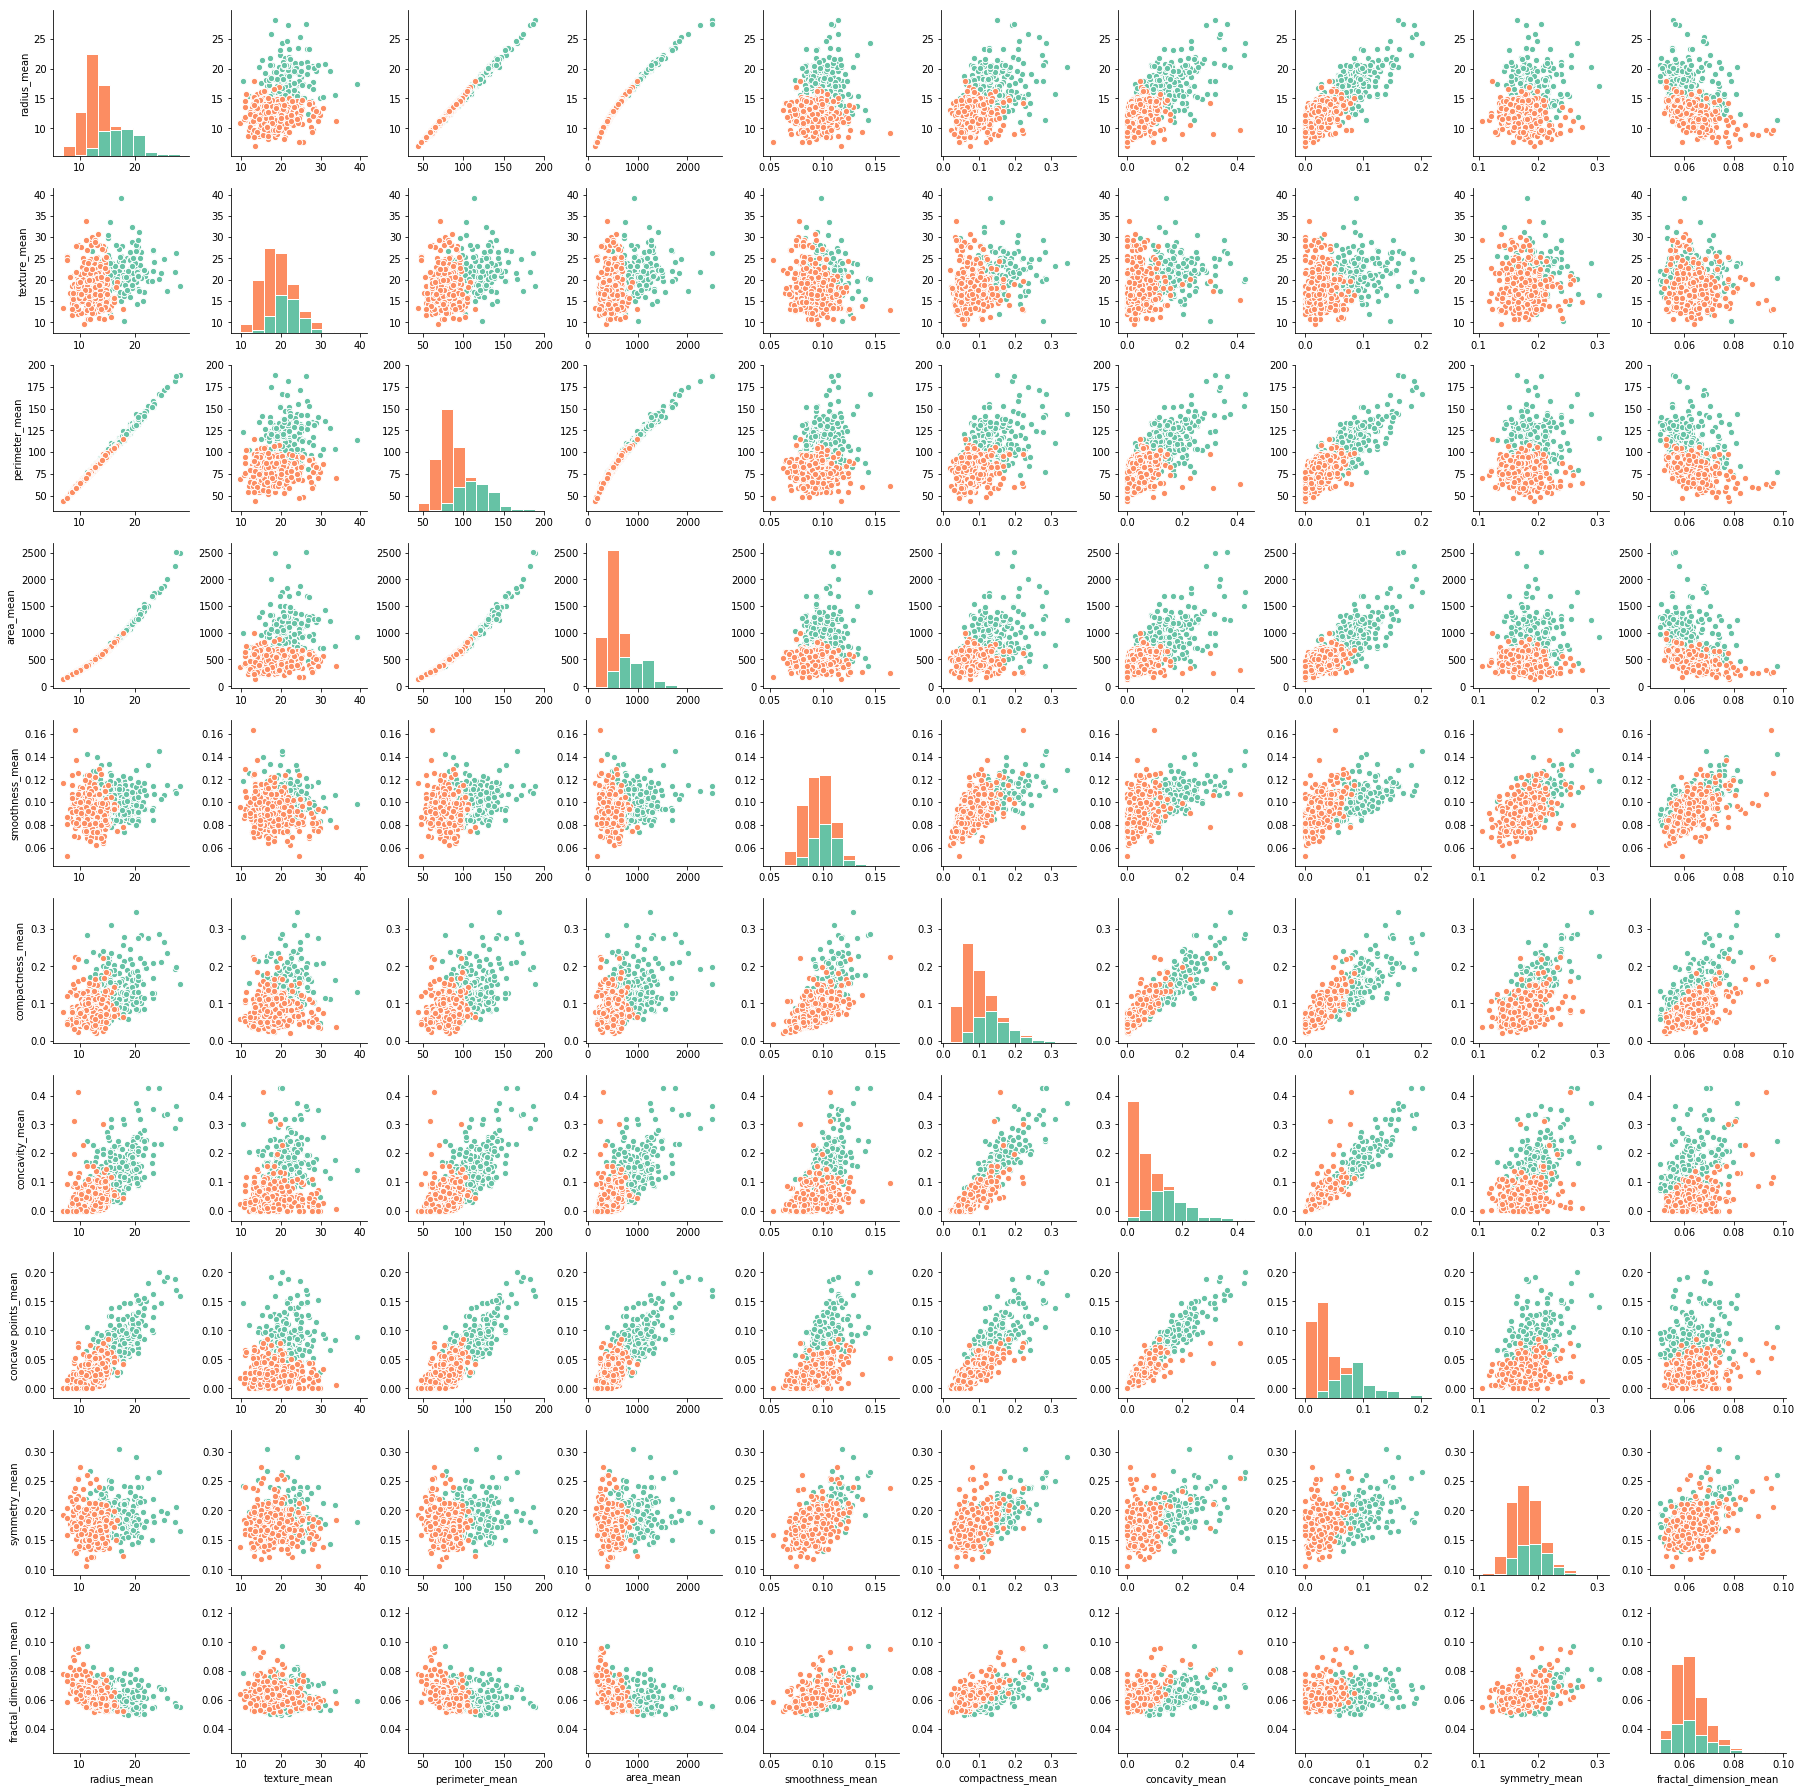

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.PairGrid(df.iloc[:, 0:11], hue="diagnosis", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
plt.show()

It seems that:
1. There are strong correlations between many variables. Next, a heatmap will be used to present the numerical correlations.
2. The univariate distributions on the diagonal show a separation of malignant and benign cells for several mean features. Malignant cells tend to have larger mean values of:
    * radius
    * perimeter
    * area
    * compactness
    * concavity
    * concave points

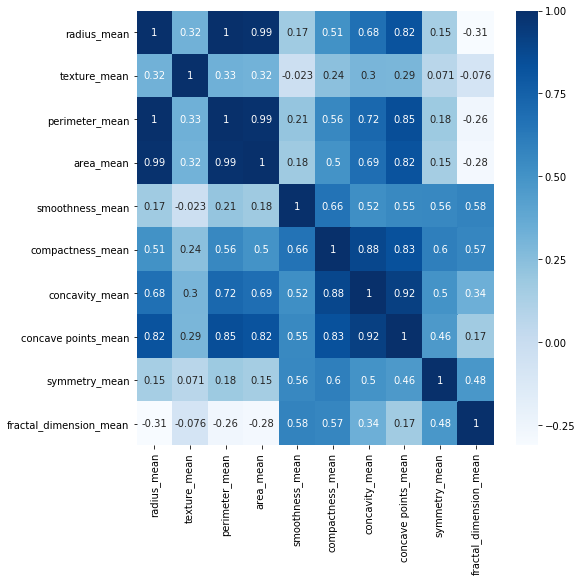

In [7]:
df_corr = df.iloc[:, 1:11].corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

* As it was expected there are very strong correlations between radius, perimeter and area.
* Compactness, concavity and and concave points are also highly correlated.

These highly correlated features result in redundant information. It is suggested to remove highly correlated features to avoid a predictive bias for the information contained in these features.

### Encode "diagnosis" to numerical values

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

## Machine Learning
### Split Data to Train/Test Sets
Create train/test sets using the `train_test_split` function. The `test_size=0.3` inside the function indicates the percentage of the data that should be held over for testing.

In [9]:
from sklearn.model_selection import train_test_split

array = df.values

# Define the independent variables as features.
features = array[:,1:]

# Define the target (dependent) variable as labels.
labels = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Check the split printing the shape of each set.
print(features_train.shape, labels_train.shape)
print(features_test.shape, labels_test.shape)

(398, 30) (398,)
(171, 30) (171,)


### K Nearest Neighbors (K-NN) Classifier
K-NN was chosen amongst other algorithms (e.g. Support Vector Machines, Decision Trees and Naive Bayes), because it is quite fast and produces acceptable results. The speed of K-NN can be explained by the fact that this algorithm is a lazy learner and does not do much during training process unlike other classifiers that build the models. The performance of K-NN will be examined tuning the algorithm and applying various preprocessing steps.
#### Evaluation of the algorithm
Accuracy, i.e. the fraction of correct predictions is typically not enough information to evaluate a model. Although it is a starting point, it can lead to invalid decisions. Models with high accuracy may have inadequate precision or recall scores. For this reason the evaluation metrics that were also assessed are:
* Precision or the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0. In our study case, precision is when the algorithm guesses that a cell is malignant and actually measures how certain we are that this cell is a true malignant. For example, a precision of 0.9 means that if the model predicts 100 malignant cells, the 90 of them are malignant and the rest 10 are benign (false).
* Recall or the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0. In context to the study, recall shows how well our identifier can find the malignant cells. For example, a low recall score of 0.8 indicates that our identifier finds only 80% of all the real malignant cells in the prediction. The rest 20% of real malignant cells will not be found by the diagnosis based on this algorithm, something that is unacceptable.
* F1 score, a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 x (precision x recall) / (precision + recall).

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    clf = KNeighborsClassifier()

    # Fit the classifier on the training features and labels.
    t0 = time()
    clf.fit(features_train, labels_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = clf.predict(features_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = clf.score(features_test, labels_test)
    report = classification_report(labels_test, predictions)

    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(labels_test, predictions))

print_ml_results()

Training time: 0.001 s
Prediction time: 0.002 s

Report:

Accuracy: 0.9590643274853801

              precision    recall  f1-score   support

        0.0       0.95      0.99      0.97       108
        1.0       0.98      0.90      0.94        63

avg / total       0.96      0.96      0.96       171

[[107   1]
 [  6  57]]


* The algorithm will be tuned to achieve an improved performance, especially a better recall score for the malignant class, since 90% can be considered a low recall score in this case.

#### Remove Highly Correlated Features and Run Again
Investigate if removing manually features with a correlation higher than 0.8, can benefit the algorithm performance, although later this will be handled automatically by dimensionality reduction.

In [11]:
df_new = df[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
            'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'smoothness_se',
            'compactness_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'concavity_worst', 'symmetry_worst',
            'fractal_dimension_worst']]

array = df_new.values

# Define the independent variables as features.
features_new = array[:,1:]

# Define the target (dependent) variable as labels.
labels_new = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new, \
                                                                            test_size=0.3, random_state=42)

print_ml_results()

Training time: 0.001 s
Prediction time: 0.003 s

Report:

Accuracy: 0.9005847953216374

              precision    recall  f1-score   support

        0.0       0.88      0.97      0.93       108
        1.0       0.94      0.78      0.85        63

avg / total       0.90      0.90      0.90       171

[[105   3]
 [ 14  49]]


There is a significant decrease in algorithm's accuracy and recall mostly for the malignant class. It's difficult to select manually the best features especially for datasets with many features correlated. Sometimes, ambiguity can occur when three or more variables are correlated. For example, if feature 1 is correlated with feature 2, while feature 2 is correlated with feature 3 but not feature 1, which one is better to remove? To resolve this automatically, dimensionality reduction methods are used such as Principal Component Analysis.

### Cross Validation
Train/test split has a lurking danger if the split isn't random and when one subset of our data has only observations from one class, i.e. our data are imbalanced. This will result in overfitting. To avoid this, cross validation is applied. There are several cross validation methods such as K-Fold and Stratified K-Fold.

In K-Fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is the increased accuracy because all observations are used for both training and validation, and each observation is used for validation exactly once.

If the original data comes in some sort of sorted shape, a shuffle of the order of the data points is necessary before splitting them up into folds. This can be done in `KFold()`, setting the `shuffle` parameter to `True`. If there are concerns about class imbalance, then the `StratifiedKFold()` class should be used instead. Where `KFold()` assigns points to folds without attention to output class, `StratifiedKFold()` assigns data points to folds so that each fold has approximately the same number of data points of each output class. This is most useful for when we have imbalanced numbers of data points in the outcome classes (e.g. one is rare compared to the others). For this class as well, it can be used `shuffle=True` to shuffle the data points' order before splitting into folds.

### Scale Features
A common good practice in machine learning is feature scaling, normalization, standardization or binarization of the predictor variables. The main purposes of these methods are two:
1. Create comparable features in terms of units, e.g. if there are values in different units, then, the scaled data will be the same.
2. Create comparable features in terms of size, e.g. if two variables have vastly different ranges, the one with the larger range may dominate the predictive model, even though it may be less important to the target variable than the variable with the smaller range.

Feature scaling was applied here, since it is useful for algorithms that weigh inputs like regression and neural networks, as well as algorithms that use distance measures like K-NN.

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

np.set_printoptions(precision=2, suppress=True)

scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(features)
print("Unscaled data\n", features_train)
print("\nScaled data\n", features_scaled)

Unscaled data
 [[ 13.74  17.91   0.08 ...,   0.16   0.23   0.07]
 [ 13.37  16.39   0.07 ...,   0.33   0.2    0.08]
 [ 14.69  13.98   0.1  ...,   0.32   0.28   0.09]
 ..., 
 [ 14.29  16.82   0.06 ...,   0.04   0.25   0.06]
 [ 13.98  19.62   0.11 ...,   0.41   0.32   0.11]
 [ 12.18  20.52   0.08 ...,   0.11   0.27   0.07]]

Scaled data
 [[ 0.52  0.02  0.55 ...,  0.91  0.6   0.42]
 [ 0.64  0.27  0.62 ...,  0.64  0.23  0.22]
 [ 0.6   0.39  0.6  ...,  0.84  0.4   0.21]
 ..., 
 [ 0.46  0.62  0.45 ...,  0.49  0.13  0.15]
 [ 0.64  0.66  0.67 ...,  0.91  0.5   0.45]
 [ 0.04  0.5   0.03 ...,  0.    0.26  0.1 ]]


### Principal Component Analysis (PCA)
PCA is a preprocessing step, which decomposes a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. It is used when we need to tackle datasets with a large number of features with different scales, some of which might be correlated. These correlations and the high dimension of the dataset bring a redudancy in the information. Applying PCA, the original features are transformed to linear combinations of new independent variables, which reduce the complexity of the dataset and thus, the computational cost.

Summarizing, the main purpose of principal component analysis is to:
* identify hidden pattern in a data set,
* reduce the dimensionnality of the data by removing the noise and redundancy in the data,
* identify correlated variables

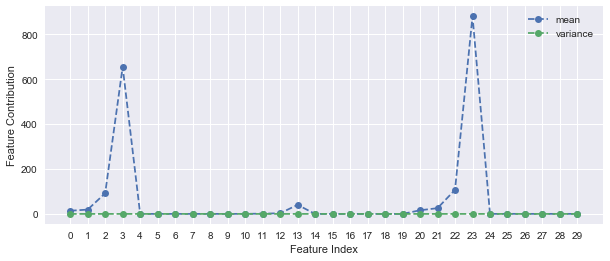

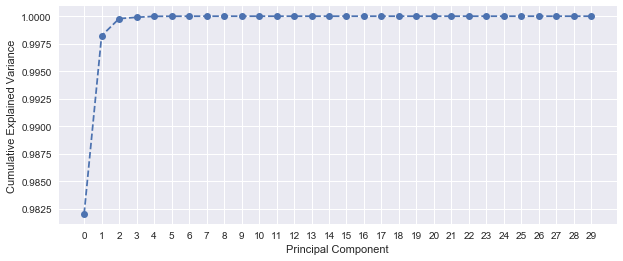

In [13]:
from sklearn.decomposition import PCA

pca = PCA(30)
projected = pca.fit_transform(features)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plt.style.use('seaborn')

def plot_pca():
    plt.figure(figsize=(10, 4))
    plt.plot(pca_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(pca_inversed_data.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

    plt.figure(figsize = (10, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

plot_pca()

Applying PCA on the unscaled dataset, it seems that more than 99% of the variance is explained by only one component, which is too good to be true. The feature contribution plot depicts that principal components 3 (`area_mean`) and 23 (`area_worst`) dominate the PCA. This is explained by the large variance of `area_mean` and `area_worst` (see std values of the Data Exploration section). To avoid this, feature scaling prior to PCA is highly recommended.

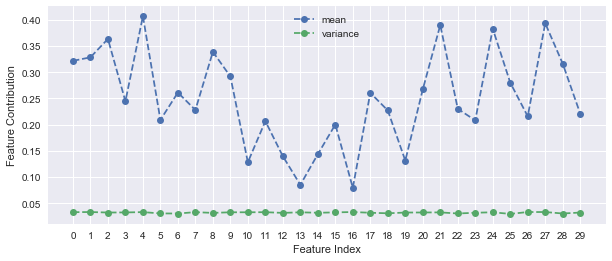

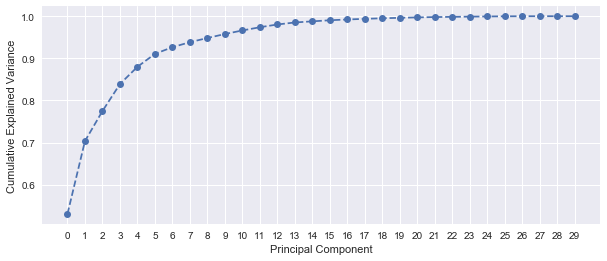

In [14]:
projected_scaled = pca.fit_transform(features_scaled)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plot_pca()

After applying scaling before PCA, 5 principal components are required to explain more than 90% of the variance. This shows a better handle on the variation within the dataset.

### Univariate Feature Selection
This preprocessing step is used to select the best features based on univariate statistical tests. Most common methods are:
* `SelectKBest()`, which removes all but the k highest scoring features, and
* `SelectPercentile()`, which removes all but a user-specified highest scoring percentage of features.

**Note:** First the dataset must be splitted into train and test sets, since performing feature selection on the whole dataset would lead to prediction bias.

In [15]:
from sklearn.feature_selection import SelectKBest

select = SelectKBest()
select.fit(features_train, labels_train)
scores = select.scores_
# Show the scores in a table
feature_scores = zip(df.columns.values.tolist(), scores)
ordered_feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)
for feature, score in ordered_feature_scores:
    print(feature, score)

diagnosis 409.324586491
perimeter_se 330.705030068
perimeter_mean 203.275858673
compactness_mean 167.442537437
area_se 91.7932292151
radius_mean 78.2141419938
fractal_dimension_mean 73.0964305619
texture_mean 57.9040462077
area_mean 55.6815629466
smoothness_se 36.5031400131
symmetry_mean 31.5442869773
texture_se 1.43610838765
concave points_mean 0.963553272104
radius_se 0.441799916915
smoothness_mean 0.407997081673
concavity_mean 0.181306268427


### Tune the algorithm
#### Putting it all together with GridSearchCV and Pipeline
Algorithm tuning is a process in which we optimize the parameters that impact the model in order to enable the algorithm to perform with an improved performance. If we don't tune the algorithms well, performance will be poor with low accuracy, precision or recall. Most of the machine learning algorithms contain a set of parameters (hyperparameters), which should be set up adequately to perform the best. While all of the algorithms attempt to set reasonable default hyperparameters, they can often fail to provide optimal results for many real world datasets in practice. To find an optimized combination of hyperparameters, a metric is chosen to measure the algorithm's performance on an independent data set and hyperparameters that maximize this measure are adopted.

Tuning the models is a tedious, time-consuming process and there can sometimes be interactions between the choices we make in one step and the optimal value for a downstream step. Hopefully, there are two simple and easy tuning strategies, grid search and random search. Scikit-learn provides these two methods for algorithm parameter tuning. `GridSearchCV()` allows us to construct a grid of all the combinations of parameters passing one classifier to pipeline each time, tries each combination, and then reports back the best combination. So, instead of trying numerous values for each tuning parameter, `GridSearchCV()` will apply all the combinations of parameters - not just vary them independently - avoiding local optima.

The power of `GridSearchCV()` is that it multiplies out all the combinations of parameters and tries each one, making a k-fold cross-validated model for each combination. Then, we can ask for predictions and parameters from our `GridSearchCV()` object and it will automatically return to us the best set of predictions, as well as the best parameters.

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Create the scaler.
scaler = MinMaxScaler(feature_range=(0,1))

# Scale down all the features (both train and test dataset).
features = scaler.fit_transform(features)

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Create the classifier.
clf = KNeighborsClassifier()

# Create the pipeline.
pipeline = Pipeline([('reduce_dim', PCA()),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

# Create a function to find the best estimator.
def get_best_estimator(n_splits):

    t0 = time()

    # Create Stratified ShuffleSplit cross-validator.
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=3)

    # Create grid search.
    grid = GridSearchCV(pipeline, param_grid=parameters, scoring=('f1'), cv=sss, refit='f1')

    # Fit pipeline on features_train and labels_train.
    grid.fit(features_train, labels_train)

    # Make predictions.
    predictions = grid.predict(features_test)

    # Test predictions using sklearn.classification_report().
    report = classification_report(labels_test, predictions)

    # Find the best parameters and scores.
    best_parameters = grid.best_params_
    best_score = grid.best_score_

    # Print the reports.
    print("\nReport:\n")
    print(report)
    print("Best f1-score:")
    print(best_score)
    print("Best parameters:")
    print(best_parameters)
    print(confusion_matrix(labels_test, predictions))
    print("Time passed: ", round(time() - t0, 3), "s")
    
    return grid.best_estimator_

get_best_estimator(n_splits=20)


Report:

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98       108
        1.0       0.97      0.95      0.96        63

avg / total       0.97      0.97      0.97       171

Best f1-score:
0.943663253206
Best parameters:
{'clf__algorithm': 'auto', 'clf__n_neighbors': 6, 'reduce_dim': PCA(copy=True, iterated_power=7, n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 5}
[[106   2]
 [  3  60]]
Time passed:  11.427 s


Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power=7, n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform'))])

#### Combine PCA and Feature Selection with FeatureUnion
Often it is beneficial to combine several methods to obtain good performance. `FeatureUnion()` will be used to combine features obtained by PCA and univariate selection, `SelectKBest()`. Combining features using this transformer has the advantage that it allows cross validation and grid searches over the whole process. Datasets that benefit from this can often:
* consist of heterogeneous data types (e.g. raster images and text captions),
* are stored in a Pandas DataFrame and different columns require different processing pipelines.

In [17]:
# Build the estimator from PCA and univariate selection.
combined_features = FeatureUnion([('pca', PCA()), ('univ_select', SelectKBest())])

# Do grid search over k, n_components and K-NN parameters.
pipeline = Pipeline([('features', combined_features),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'features__pca': [PCA(iterated_power=7)],
        'features__pca__n_components': n_features_options,
        'features__univ_select__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

get_best_estimator(20)


Report:

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98       108
        1.0       0.98      0.94      0.96        63

avg / total       0.97      0.97      0.97       171

Best f1-score:
0.949037467804
Best parameters:
{'clf__algorithm': 'auto', 'clf__n_neighbors': 6, 'features__pca': PCA(copy=True, iterated_power=7, n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'features__pca__n_components': 5, 'features__univ_select__k': 3}
[[107   1]
 [  4  59]]
Time passed:  33.675 s


Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power=7, n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=3, score_func=<function f_classif at 0x1a240f5048>))],
       transformer_weights=None)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform'))])

### Conclusions

In this study, K-NN algorithm was applied for the diagnosis of the Breast Cancer Wisconsin DataSet. It was found that precision and recall scores can be considerably improved applying the following steps:
* Feature Scaling
* Dimensionality Reduction
* Cross Validation
* Hyperparameter Optimization

For better results more data are required and other algorithms should be used.

### References
1. http://scikit-learn.org/stable/index.html
2. https://jakevdp.github.io/PythonDataScienceHandbook/
3. http://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/
3. https://medium.com/towards-data-science/train-test-split-and-cross-validation-in-python-80b61beca4b6